# DATA PREPARATION

In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [12]:
data= pd.read_csv("C:/Users/LICT/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [13]:
#Check for missing value
missing_values = data.isnull().sum()
missing_values.head()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [14]:
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
print(data['TotalCharges'].isnull().sum())

0


In [16]:
print(data['TotalCharges'].unique())


['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [17]:
# Identify rows with non-numeric or blank entries in 'TotalCharges'
non_numeric_rows = data[data['TotalCharges'].str.strip() == '']
print(non_numeric_rows)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

This shows the TotalCharges rows which are empty and not showing NAN probably because they are stored as String


In [18]:
data['TotalCharges'] = data['TotalCharges'].replace('', '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

The error indicates that there are blank or whitespace strings in the TotalCharges column, which can't be converted directly to numeric. Here's how you can fix this issue:

In [19]:
# Replace blank or whitespace strings with '0'
data['TotalCharges'] = data['TotalCharges'].str.strip().replace('', '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [20]:
missing_values = data.isnull().sum()
missing_values.head()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [21]:
# Convert 'TotalCharges' to string type
data['TotalCharges']=data['TotalCharges'].astype(str)

In [22]:
# Check for remaining leading/trailing spaces in 'TotalCharges'
data['TotalCharges'].str.contains('^ | $').sum()


0

In [23]:
# Strip leading/trailing spaces
data['TotalCharges'] = data['TotalCharges'].str.strip()


In [24]:
empty_strings_count = (data['TotalCharges'] == '').sum()
print(f"Number of empty strings: {empty_strings_count}")

Number of empty strings: 0


In [25]:
#Check for NaN values
nan_count = data['TotalCharges'].isnull().sum()
print(f"Number of NaN values: {nan_count}")

Number of NaN values: 0


In [26]:
# Convert 'TotalCharges' to numeric (float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Convert 'MonthlyCharges' to float (if necessary)
data['MonthlyCharges'] = data['MonthlyCharges'].astype(float)

# Convert 'tenure' to integer (if necessary)
data['tenure'] = data['tenure'].astype(int)

In [27]:
data.columns = data.columns.str.strip()


# Encoding Categorical Variables

We need to convert categorical columns into numerical values. You can use **Label Encoding** for binary categories (e.g., gender, SeniorCitizen) and **One-Hot Encoding** for non-binary categories (e.g., InternetService, Contract).

**Label Encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder

#Initiate LabelEncoder
label_encoder = LabelEncoder()

#Encoding Binary Categorical Variables
data['gender'] = label_encoder.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder.fit_transform(data['SeniorCitizen'].astype(str))  # Convert 'Yes'/'No' to 1/0


**One-Hot Encoding**

For non-binary categories (e.g., InternetService, Contract), we use One-Hot Encoding to create binary columns for each category.

In [29]:
# One-hot encoding for non-binary categorical variables
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod', 'TechSupport', 'StreamingTV'], drop_first=True)

The **drop_first=True**, argument is used to avoid multicollinearity (by removing one of the categories)

**pandas.get_dummies** is a function in pandas used to perform One-Hot Encoding on categorical variables.

In [30]:
from sklearn.preprocessing import StandardScaler

#Initiate Standard Scaler
scaler = StandardScaler()

#Scale numeric columns
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [31]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,7590-VHVEG,0,0,Yes,No,-1.277445,No,No phone service,No,Yes,...,False,False,False,False,True,False,False,False,False,False
1,5575-GNVDE,1,0,No,No,0.066327,Yes,No,Yes,No,...,False,True,False,False,False,True,False,False,False,False
2,3668-QPYBK,1,0,No,No,-1.236724,Yes,No,Yes,Yes,...,False,False,False,False,False,True,False,False,False,False
3,7795-CFOCW,1,0,No,No,0.514251,No,No phone service,Yes,No,...,False,True,False,False,False,False,False,True,False,False
4,9237-HQITU,0,0,No,No,-1.236724,Yes,No,No,No,...,False,False,False,False,True,False,False,False,False,False
5,9305-CDSKC,0,0,No,No,-0.992402,Yes,Yes,No,No,...,False,False,False,False,True,False,False,False,False,True
6,1452-KIOVK,1,0,No,Yes,-0.422317,Yes,Yes,No,Yes,...,False,False,False,True,False,False,False,False,False,True
7,6713-OKOMC,0,0,No,No,-0.910961,No,No phone service,Yes,No,...,False,False,False,False,False,True,False,False,False,False
8,7892-POOKP,0,0,Yes,No,-0.177995,Yes,Yes,No,No,...,False,False,False,False,True,False,False,True,False,True
9,6388-TABGU,1,0,No,Yes,1.206498,Yes,No,Yes,Yes,...,False,True,False,False,False,False,False,False,False,False


In [32]:
# Display the first 5 rows of the newly encoded data
print(data[['gender', 'SeniorCitizen', 'InternetService_Fiber optic', 'Contract_Two year']].head())


   gender  SeniorCitizen  InternetService_Fiber optic  Contract_Two year
0       0              0                        False              False
1       1              0                        False              False
2       1              0                        False              False
3       1              0                        False              False
4       0              0                         True              False


# Exploratory Data Analysis (EDA)

**Correlation Analysis**: A correlation heatmap helps identify relationships between numeric features and the target variable (Churn). Positive correlation values indicate a direct relationship, while negative values indicate an inverse relationship.

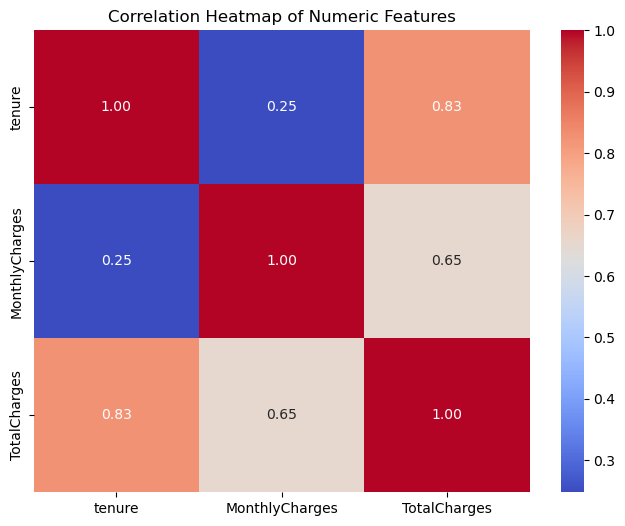

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numeric columns
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

NB: If Churn is included as numeric (e.g., 0 for No, 1 for Yes), you can add it to the correlation matrix:

correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()


**VISUALIZATIONS**

**Bar Plots**: Bar plots can show the distribution of Churn across categorical features like Contract or PaymentMethod.

Since the Contract column is no longer in its original form, we can visualize the relationship using the one-hot encoded columns. Here's how:

1. Aggregate the counts for each Contract category to plot their relationship with Churn.

In [34]:
# Create a mapping of Contract categories
contract_columns = ['Contract_One year', 'Contract_Two year']

# Count churned and non-churned customers for each contract type
contract_churn = data.groupby(contract_columns)['Churn'].value_counts().unstack()

# Reformat for plotting
contract_churn = contract_churn.reset_index()
contract_churn.columns.name = None

print(contract_churn)

   Contract_One year  Contract_Two year    No   Yes
0              False              False  2220  1655
1              False               True  1647    48
2               True              False  1307   166


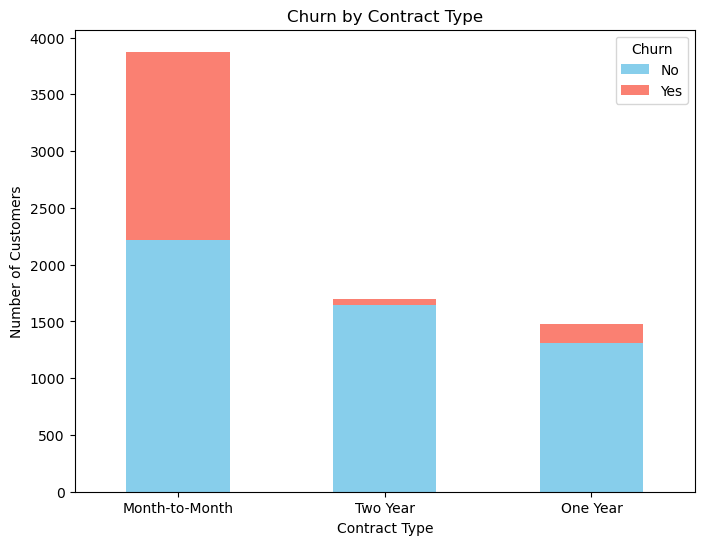

In [35]:
# Use the aggregated data for plotting
contract_churn.set_index(['Contract_One year', 'Contract_Two year'])[['No', 'Yes']].plot(
    kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon']
)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-Month', 'Two Year', 'One Year'], rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


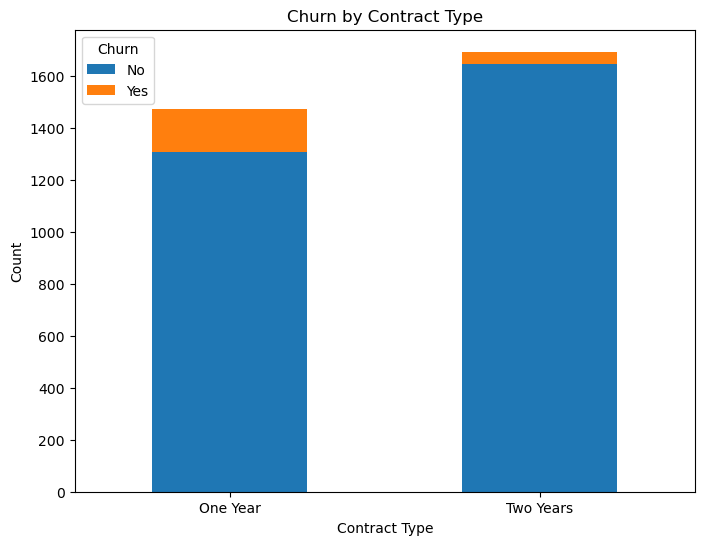

In [36]:
# Sum churned and non-churned values for each contract type
contract_churn_plot = data.groupby(['Churn'])[['Contract_One year', 'Contract_Two year']].sum()

# Plot the data
contract_churn_plot.T.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['One Year', 'Two Years'], rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


**Alternative Approach (Categorical Grouping):** If you want to reverse the one-hot encoding to combine the categories for plotting:

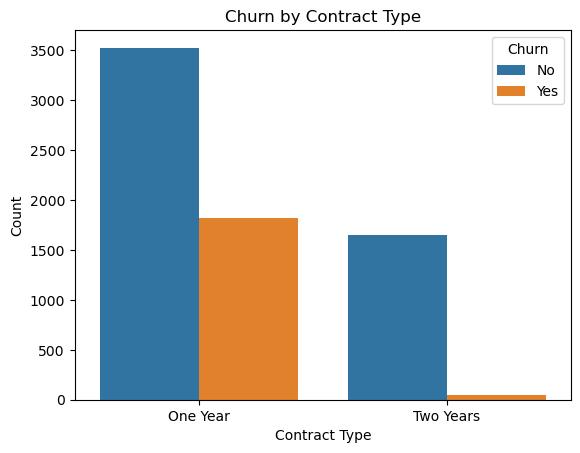

In [37]:
# Add a new column to recombine contract categories
data['Contract_Type'] = data[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)

# Replace the binary names with readable labels
data['Contract_Type'] = data['Contract_Type'].map({
    'Contract_One year': 'One Year',
    'Contract_Two year': 'Two Years'
})

# Plot using the new column
sns.countplot(x='Contract_Type', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


**Box Plots**

Box plots help compare the distribution of **numeric features** (tenure, MonthlyCharges, TotalCharges) across churn categories.

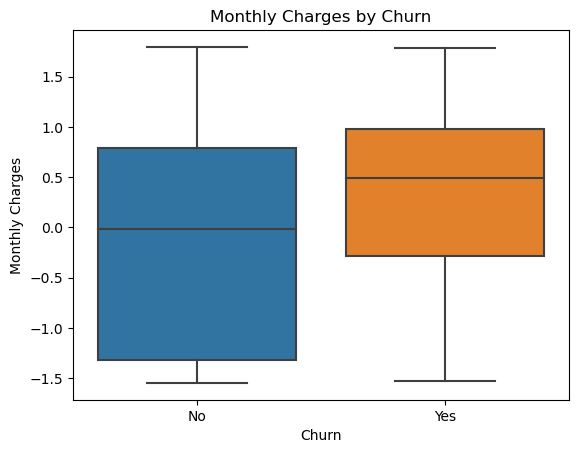

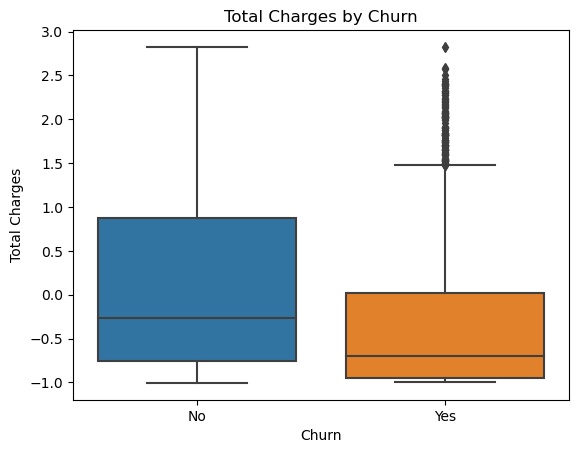

In [38]:
# Box plot for MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Box plot for TotalCharges by Churn
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()




**Histograms**

Histograms show the distribution of numeric features (e.g., tenure) and can be split by churn categories.

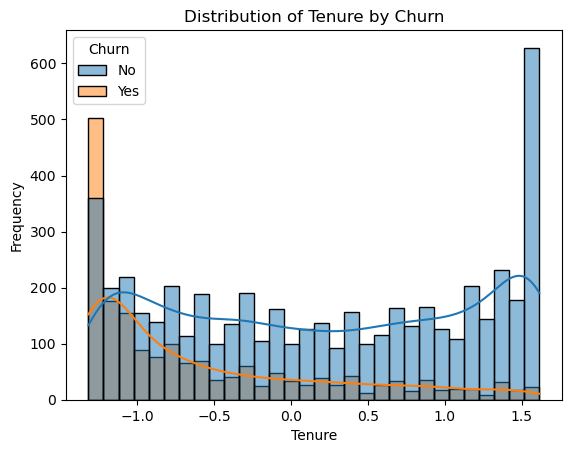

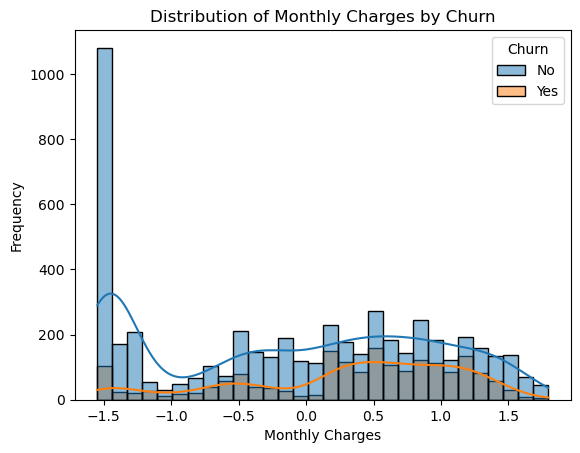

In [39]:
# Histogram for Tenure
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

# Histogram for MonthlyCharges
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


# STATISTICAL TESTING

The Chi-Square test checks if there is a significant association between two categorical variables, such as Churn and InternetService.

In [40]:
from scipy.stats import chi2_contingency

# Example: Chi-Square test for gender and Churn
contingency_table = pd.crosstab(data['gender'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
if p < 0.05:
    print("There is a significant association between gender and Churn.")
else:
    print("There is no significant association between gender and Churn.")


Chi-Square Test Results:
Chi-Square Statistic: 0.4840828822091383
P-value: 0.48657873605618596
Degrees of Freedom: 1
There is no significant association between gender and Churn.


In [41]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_Type
0,7590-VHVEG,0,0,Yes,No,-1.277445,No,No phone service,No,Yes,...,False,False,False,True,False,False,False,False,False,One Year
1,5575-GNVDE,1,0,No,No,0.066327,Yes,No,Yes,No,...,True,False,False,False,True,False,False,False,False,One Year
2,3668-QPYBK,1,0,No,No,-1.236724,Yes,No,Yes,Yes,...,False,False,False,False,True,False,False,False,False,One Year
3,7795-CFOCW,1,0,No,No,0.514251,No,No phone service,Yes,No,...,True,False,False,False,False,False,True,False,False,One Year
4,9237-HQITU,0,0,No,No,-1.236724,Yes,No,No,No,...,False,False,False,True,False,False,False,False,False,One Year


**Anova**

In [42]:
from scipy.stats import f_oneway

# Example: ANOVA for tenure grouped by Churn
grouped_data = data.groupby('Churn')['tenure']

# Extract values for the groups
churn_yes = grouped_data.get_group('Yes')  # Group where Churn == Yes
churn_no = grouped_data.get_group('No')    # Group where Churn == No

# Perform ANOVA
f_stat, p_value = f_oneway(churn_yes, churn_no)

print("ANOVA Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in tenure between churned and non-churned customers.")
else:
    print("There is no significant difference in tenure between churned and non-churned customers.")


ANOVA Results:
F-statistic: 997.2680104991439
P-value: 7.999057960610892e-205
There is a significant difference in tenure between churned and non-churned customers.


In [43]:
datadub=data.copy()

In [44]:
datadub.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_Type
0,7590-VHVEG,0,0,Yes,No,-1.277445,No,No phone service,No,Yes,...,False,False,False,True,False,False,False,False,False,One Year
1,5575-GNVDE,1,0,No,No,0.066327,Yes,No,Yes,No,...,True,False,False,False,True,False,False,False,False,One Year
2,3668-QPYBK,1,0,No,No,-1.236724,Yes,No,Yes,Yes,...,False,False,False,False,True,False,False,False,False,One Year
3,7795-CFOCW,1,0,No,No,0.514251,No,No phone service,Yes,No,...,True,False,False,False,False,False,True,False,False,One Year
4,9237-HQITU,0,0,No,No,-1.236724,Yes,No,No,No,...,False,False,False,True,False,False,False,False,False,One Year


In [45]:
columns_to_drop = ['customerID', 'Contract_Type']
data = data.drop(columns=columns_to_drop, errors='ignore')

In [46]:
# Map Yes/No to 1/0
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'TechSupport_Yes', 
                  'StreamingTV_Yes', 'StreamingMovies']

for col in binary_columns:
    data[col] = data[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0})


In [47]:
# Perform one-hot encoding for remaining categorical columns if necessary
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [48]:
# Verify data types
print(data.dtypes)


gender                                     int32
SeniorCitizen                              int32
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No internet service             bool
StreamingTV_Yes                             bool
OnlineSecurity_1    

In [49]:
# View the cleaned data
print(data.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0              0       -1.160323     -0.992611                        False   
1              0       -0.259629     -0.172165                        False   
2              0       -0.362660     -0.958066                        False   
3              0       -0.746535     -0.193672                        False   
4              0        0.197365     -0.938874                         True   

   ...  OnlineSecurity_1  OnlineSecurity_No internet service  OnlineBackup_1  \
0  ...

In [50]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,TotalCharges,InternetService_Fiber optic,...,OnlineSecurity_1,OnlineSecurity_No internet service,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingMovies_1,StreamingMovies_No internet service,PaperlessBilling_Yes,Churn_Yes
0,0,0,1,0,-1.277445,0,0,-1.160323,-0.992611,False,...,False,False,True,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,False,...,True,False,False,False,False,True,False,False,False,False
2,1,0,0,0,-1.236724,1,0,-0.362660,-0.958066,False,...,True,False,True,False,False,False,False,False,True,True
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193672,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,0,0.197365,-0.938874,True,...,False,False,False,False,False,False,False,False,True,True


# APPLYING RECURSIVE FEATURE ELIMINATION 

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


**SETTING UP AN ESTIMATOR:**

Choose the model to guide the RFE process. You can start with Logistic Regression (for simplicity)

In [52]:
# Initialize a model (e.g., Logistic Regression)
estimator = LogisticRegression(max_iter=1000, random_state=42)

**Run RFE:** Set the number of features to select or allow RFE to rank all features.

In [63]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiate RFE
rfe = RFE(estimator=estimator, n_features_to_select=10) # Choose the number of features you want
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print(f'These are the selected features:\n {selected_features}')



These are the selected features:
 Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_1', 'StreamingMovies_No internet service'],
      dtype='object')


**Train a Logistic Regression Model**

In [69]:
# 1. Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8211497515968772
Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



**Train a Decision Tree Model**

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree =DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.716820440028389
Decision Tree Report:
               precision    recall  f1-score   support

       False       0.81      0.81      0.81      1036
        True       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



**Train a Random Forest Model**

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7885024840312278
Random Forest Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



**Optional: Cross-Validation**

To get a more robust evaluation, use cross-validation:

In [67]:
from sklearn.model_selection import cross_val_score

# Example: Logistic Regression with cross-validation
log_reg = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", cv_scores.mean())


Logistic Regression Cross-Validation Accuracy: 0.8037778647009484


**Using metrics Like "precision, recall, F1-score, AUC-ROC"**

Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Logistic Regression AUC-ROC: 0.8622421253118304


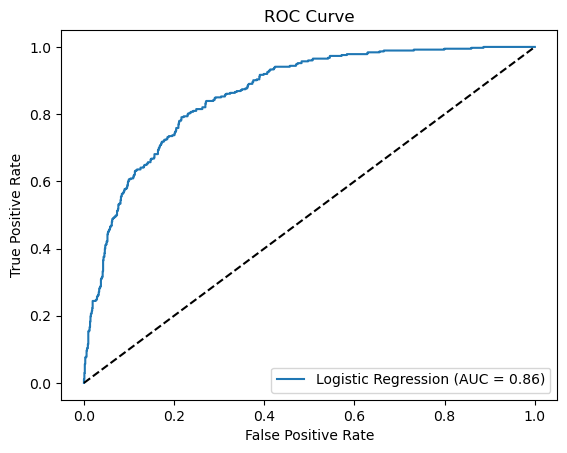

In [70]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# For Logistic Regression
y_pred_me = log_reg.predict(X_test)
y_prob_me = log_reg.predict_proba(X_test)[:, 1]

# Classification Report (Precision, Recall, F1-Score)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_me))

# AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
auc_roc_me = roc_auc_score(y_test, y_prob_me)
print("Logistic Regression AUC-ROC:", auc_roc_me)

# Plot ROC Curve (Optional)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_me)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_roc_me))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**AUC-ROC** stands for **Area Under the Receiver Operating Characteristic Curve**, and it is a performance measurement used to evaluate the ability of a classification model to distinguish between the positive and negative classes. It plots the relationship between:
1. True Positive Rate (TPR)
2. False  Positive Rate (FPR)


**The ROC curve** is generated by plotting the TPR against the FPR at various classification thresholds. By adjusting the threshold, the model's sensitivity and specificity (true negative rate) change, and the curve reflects how well the model separates the two classes.

**AUC** stands for Area Under the Curve. It quantifies the entire area under the ROC curve, providing a single value to measure the model's performance.


**How to Interpret AUC-ROC?**
1. High AUC (close to 1): The model is excellent at distinguishing between the positive and negative classes.

2. Moderate AUC (0.7–0.9): The model is good but may need improvement.

3. Low AUC (close to 0.5): The model has poor discrimination ability.

Overfitting occurs when a model performs well on the training set but poorly on the validation or test set.

NB: **Regularization**

-For Logistic Regression, use stronger regularization (C parameter).

For Decision Trees and Random Forests, limit max_depth, min_samples_split, and min_samples_leaf.

# Fine-Tuning Models

Fine-tuning involves adjusting model hyperparameters and configurations to improve performance. Here’s a step-by-step approach:

**a. For Logistic Regression**

-Hyperparameters to Tune:

1. C: Inverse of regularization strength. Smaller values specify stronger regularization.
2. solver: Optimization algorithm (e.g., 'liblinear', 'saga').

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the Parameter grid
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_log_reg = grid.best_estimator_

Best Parameters: {'C': 10, 'solver': 'saga'}


**b. Decision Trees**

-Hyperparameters to Tune:

1. max_depth: Limits the depth of the tree to prevent overfitting.
2. min_samples_split: Minimum number of samples required to split an internal node.
3. min_samples_leaf: Minimum number of samples required at a leaf node.

In [72]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_decision_tree = grid.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


**c. Random Forests**

-Hyperparameters to Tune:
1. n_estimators: Number of trees in the forest.
2. max_features: Number of features considered for splitting.
3. max_depth, min_samples_split, min_samples_leaf: Similar to Decision Trees.

In [73]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 10, None]
}

grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_random_forest = grid.best_estimator_


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


**Checking for Overfitting**

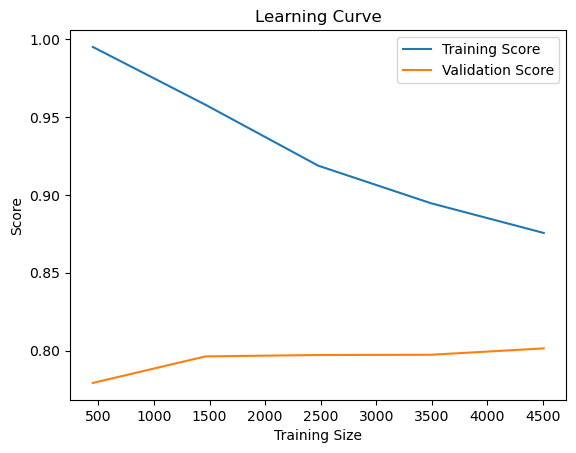

In [111]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(best_random_forest, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
